<a href="https://colab.research.google.com/github/hadisq/deep-learning-project-cracking-the-genetic-code/blob/main/proj2_hadis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from numpy.linalg import cond
from sklearn.linear_model import ElasticNet

In [ ]:
uploaded = files.upload()
data = pd.read_csv('framingham.csv')
data.info()
data.head()

Saving framingham.csv to framingham.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
for column in numerical_columns:
    data[column].fillna(data[column].mean(), inplace=True)

<ipython-input-4-ea31821ce4ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [ ]:
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

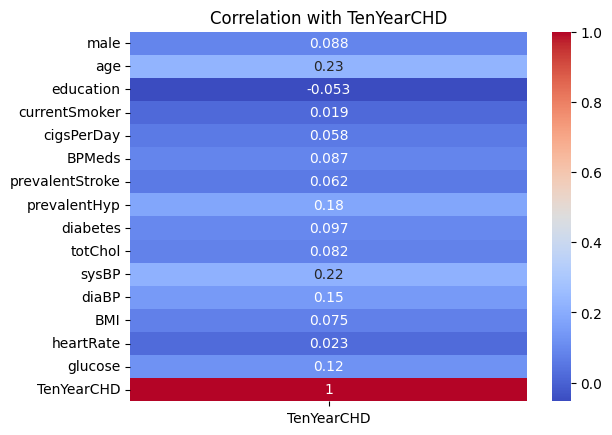

In [ ]:
correlation = data.corr()
plt.figure()
sns.heatmap(correlation[['TenYearCHD']], annot=True, cmap='coolwarm')
plt.title('Correlation with TenYearCHD')
plt.show()


In [ ]:
X = data[[ 'age', 'prevalentHyp', 'sysBP','diaBP', 'glucose']]

y = data['TenYearCHD']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_poly = model.predict(X_poly_test)

    r2_poly = r2_score(y_test, y_pred_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)

    print(f"Polynomial Regression (degree={degree}) R^2 score: {r2_poly}, MSE: {mse_poly}")

Polynomial Regression (degree=1) R^2 score: 0.07005627682800131, MSE: 0.9089239368432548
Polynomial Regression (degree=2) R^2 score: 0.05995303249643391, MSE: 0.9187988146277023
Polynomial Regression (degree=3) R^2 score: 0.010656000084367623, MSE: 0.9669815719905125
Polynomial Regression (degree=4) R^2 score: -1.2078162470881475, MSE: 2.157912339345615
Polynomial Regression (degree=5) R^2 score: -18.08271871711453, MSE: 18.651386519250895


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression R^2 score: {r2_linear}, MSE: {mse_linear}")

Linear Regression R^2 score: 0.07005627682800131, MSE: 0.9089239368432548


In [ ]:
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)

best_ridge_model = grid_search_ridge.best_estimator_
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
y_pred_best_ridge = best_ridge_model.predict(X_test)

r2_best_ridge = r2_score(y_test, y_pred_best_ridge)
mse_best_ridge = mean_squared_error(y_test, y_pred_best_ridge)

print(f"Best Ridge R^2 score: {r2_best_ridge}, MSE: {mse_best_ridge}, Best alpha: {best_alpha_ridge}")

Best Ridge R^2 score: 0.0703130228490294, MSE: 0.9086729941266293, Best alpha: 100.0


In [ ]:
param_grid_lasso = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)

best_lasso_model = grid_search_lasso.best_estimator_
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
y_pred_best_lasso = best_lasso_model.predict(X_test)

r2_best_lasso = r2_score(y_test, y_pred_best_lasso)
mse_best_lasso = mean_squared_error(y_test, y_pred_best_lasso)

print(f"Best Lasso R^2 score: {r2_best_lasso}, MSE: {mse_best_lasso}, Best alpha: {best_alpha_lasso}")

Best Lasso R^2 score: 0.07101681790964953, MSE: 0.9079851071488584, Best alpha: 0.01


poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_poly = model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression R^2 score: {r2_poly}, MSE: {mse_poly}")

result:

Polynomial Regression R^2 score: 0.010656000084367623, MSE: 0.9669815719905125

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_poly, y_train)
y_pred_poly_ridge = model_ridge.predict(X_test_poly)

r2_poly_ridge = r2_score(y_test, y_pred_poly_ridge)
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
print(f"Polynomial Ridge Regression R^2 score: {r2_poly_ridge}, MSE: {mse_poly_ridge}")

result:
Polynomial Ridge Regression R^2 score: -1.1713632830853933, MSE: 2.1222833322074486

model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_poly, y_train)
y_pred_poly_lasso = model_lasso.predict(X_test_poly)

r2_poly_lasso = r2_score(y_test, y_pred_poly_lasso)
mse_poly_lasso = mean_squared_error(y_test, y_pred_poly_lasso)
print(f"Polynomial Lasso Regression R^2 score: {r2_poly_lasso}, MSE: {mse_poly_lasso}")


result:
Polynomial Lasso Regression R^2 score: 0.03955065288715054, MSE: 0.9387400333631618



# Adding noise

In [ ]:
noise_levels = [0.01, 0.05, 0.1, 0.2]

for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"noise: {noise_level} - R^2: {r2}, MSE: {mse}")

noise: 0.01 - R^2: 0.07013778415411642, MSE: 0.9093308924099359
noise: 0.05 - R^2: 0.07108895741673349, MSE: 0.9128726319173264
noise: 0.1 - R^2: 0.0678497621558578, MSE: 0.9294617495805313
noise: 0.2 - R^2: 0.06718486214019193, MSE: 0.9681319212646455


In [ ]:
for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    model_ridge = Ridge()
    model_ridge.fit(X_train, y_train)
    y_pred_ridge = model_ridge.predict(X_test)

    r2_ridge = r2_score(y_test, y_pred_ridge)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)

    print(f"Ridge Regression - Noise: {noise_level} - R^2: {r2_ridge}, MSE: {mse_ridge}")

Ridge Regression - Noise: 0.01 - R^2: 0.07035833803697877, MSE: 0.908620685028136
Ridge Regression - Noise: 0.05 - R^2: 0.06937479283995829, MSE: 0.9144465680191322
Ridge Regression - Noise: 0.1 - R^2: 0.07004196422049158, MSE: 0.9103107571341859
Ridge Regression - Noise: 0.2 - R^2: 0.06448018752046436, MSE: 0.9465731753747902
----------------------------------------


In [ ]:
for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    model_lasso = Lasso()
    model_lasso.fit(X_train, y_train)
    y_pred_lasso = model_lasso.predict(X_test)

    r2_lasso = r2_score(y_test, y_pred_lasso)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)

    print(f"Lasso Regression - Noise: {noise_level} - R^2: {r2_lasso}, MSE: {mse_lasso}")

Lasso Regression - Noise: 0.01 - R^2: -0.00030690594972915264, MSE: 0.9776821037356714
Lasso Regression - Noise: 0.05 - R^2: -0.0002518397716912979, MSE: 0.9775351136506081
Lasso Regression - Noise: 0.1 - R^2: -0.0002600794525284833, MSE: 0.9899514902990456
Lasso Regression - Noise: 0.2 - R^2: -0.0008116206049399999, MSE: 1.021674631891031


# condition number

In [ ]:
condition_number = cond(X_train)
print(f"Condition Number of the system: {condition_number}")

Condition Number of the system: 3.783145121733801


In [ ]:
condition_numbers = []

for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    condition_number = cond(X_train)
    condition_numbers.append(condition_number)
    print(f"Noise Level: {noise_level} - Condition Number: {condition_number:.4f}")

Noise Level: 0.01 - Condition Number: 3.7831
Noise Level: 0.05 - Condition Number: 3.7831
Noise Level: 0.1 - Condition Number: 3.7831
Noise Level: 0.2 - Condition Number: 3.7831


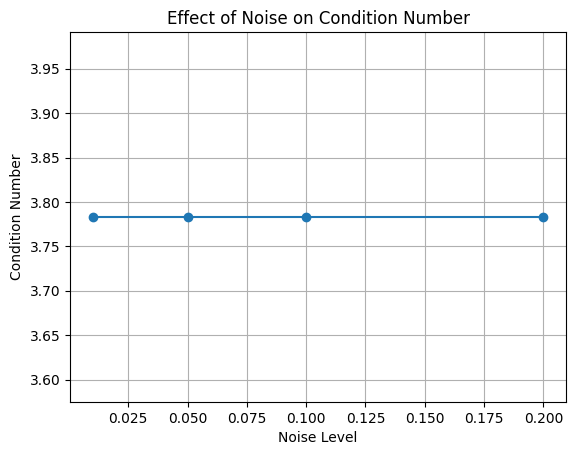

In [ ]:
plt.figure()
plt.plot(noise_levels, condition_numbers, marker='o')
plt.xlabel('Noise Level')
plt.ylabel('Condition Number')
plt.title('Effect of Noise on Condition Number')
plt.grid(True)
plt.show()

# System Sensitivity to Noise

In [ ]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    elastic_net_model.fit(X_train, y_train)
    y_pred = elastic_net_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Elastic Net with Noise Level {noise_level} - R^2: {r2:.4f}, MSE: {mse:.4f}")


Elastic Net with Noise Level 0.01 - R^2: -0.0003, MSE: 0.9773
Elastic Net with Noise Level 0.05 - R^2: -0.0002, MSE: 0.9807
Elastic Net with Noise Level 0.1 - R^2: -0.0002, MSE: 0.9808
Elastic Net with Noise Level 0.2 - R^2: -0.0000, MSE: 1.0141


In [ ]:
sensitivity_results = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "elastic net": ElasticNet()
}

for noise_level in noise_levels:
    y_noisy = y + np.random.normal(0, noise_level, size=y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        sensitivity_results.append((model_name, noise_level, r2, mse))
        print(f"{model_name} with Noise Level {noise_level} - R^2: {r2:.4f}, MSE: {mse:.4f}")

Linear Regression with Noise Level 0.01 - R^2: 0.0700, MSE: 0.9090
Ridge Regression with Noise Level 0.01 - R^2: 0.0700, MSE: 0.9090
Lasso Regression with Noise Level 0.01 - R^2: -0.0003, MSE: 0.9777
elastic net with Noise Level 0.01 - R^2: -0.0003, MSE: 0.9777
Linear Regression with Noise Level 0.05 - R^2: 0.0701, MSE: 0.9103
Ridge Regression with Noise Level 0.05 - R^2: 0.0702, MSE: 0.9102
Lasso Regression with Noise Level 0.05 - R^2: -0.0003, MSE: 0.9792
elastic net with Noise Level 0.05 - R^2: -0.0003, MSE: 0.9792
Linear Regression with Noise Level 0.1 - R^2: 0.0712, MSE: 0.9176
Ridge Regression with Noise Level 0.1 - R^2: 0.0712, MSE: 0.9176
Lasso Regression with Noise Level 0.1 - R^2: -0.0003, MSE: 0.9883
elastic net with Noise Level 0.1 - R^2: -0.0003, MSE: 0.9883
Linear Regression with Noise Level 0.2 - R^2: 0.0712, MSE: 0.9494
Ridge Regression with Noise Level 0.2 - R^2: 0.0712, MSE: 0.9494
Lasso Regression with Noise Level 0.2 - R^2: -0.0005, MSE: 1.0227
elastic net with Nois

In [ ]:
print(sensitivity_results)

[('Linear Regression', 0.01, 0.06997380561784705, 0.9090492100765606), ('Ridge Regression', 0.01, 0.06997665702223488, 0.9090464229863452), ('Lasso Regression', 0.01, -0.0002744334803745918, 0.9777129817501439), ('elastic net', 0.01, -0.0002744334803745918, 0.9777129817501439), ('Linear Regression', 0.05, 0.07014902380432131, 0.9102500595696793), ('Ridge Regression', 0.05, 0.07015195983305733, 0.9102471854313493), ('Lasso Regression', 0.05, -0.00030224826752478506, 0.979216244734669), ('elastic net', 0.05, -0.00030224826752478506, 0.979216244734669), ('Linear Regression', 0.1, 0.07122841204886488, 0.9176260997693333), ('Ridge Regression', 0.1, 0.07123066610948925, 0.9176238727579925), ('Lasso Regression', 0.1, -0.00030431167025612993, 0.9883004131568223), ('elastic net', 0.1, -0.00030431167025612993, 0.9883004131568223), ('Linear Regression', 0.2, 0.07118163111635745, 0.9494189234986201), ('Ridge Regression', 0.2, 0.07118337789988183, 0.9494171379726348), ('Lasso Regression', 0.2, -0.0

In [ ]:
sensitivity_df = pd.DataFrame(sensitivity_results, columns=['Model', 'Noise Level', 'R2', 'MSE'])

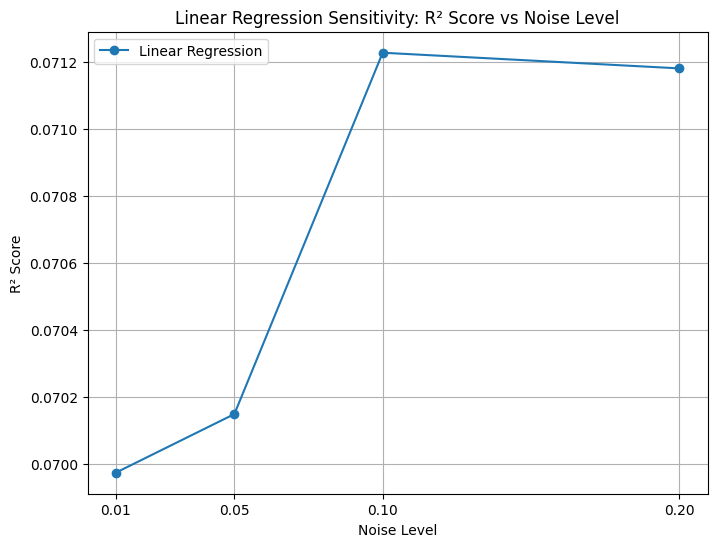

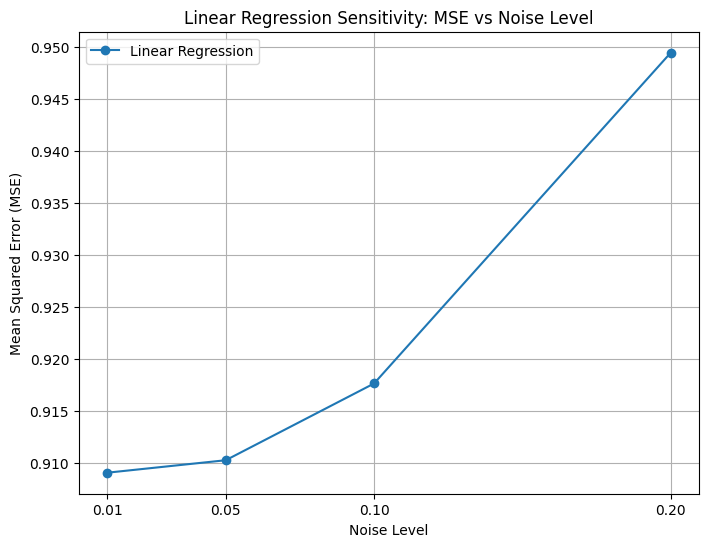

In [ ]:
subset_lr = sensitivity_df[sensitivity_df['Model'] == 'Linear Regression']
plt.figure(figsize=(8, 6))
plt.plot(subset_lr['Noise Level'], subset_lr['R2'], marker='o', label='Linear Regression')
plt.title('Linear Regression Sensitivity: R² Score vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('R² Score')
plt.xticks(subset_lr['Noise Level'])
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(subset_lr['Noise Level'], subset_lr['MSE'], marker='o', label='Linear Regression')
plt.title('Linear Regression Sensitivity: MSE vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(subset_lr['Noise Level'])
plt.grid()
plt.legend()
plt.show()

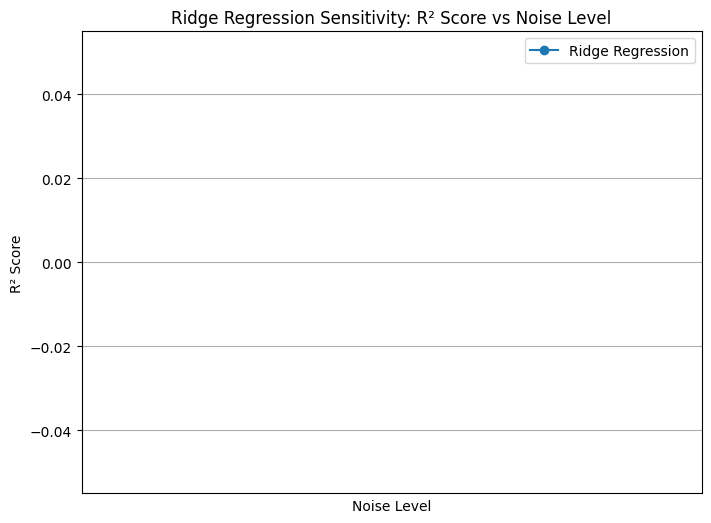

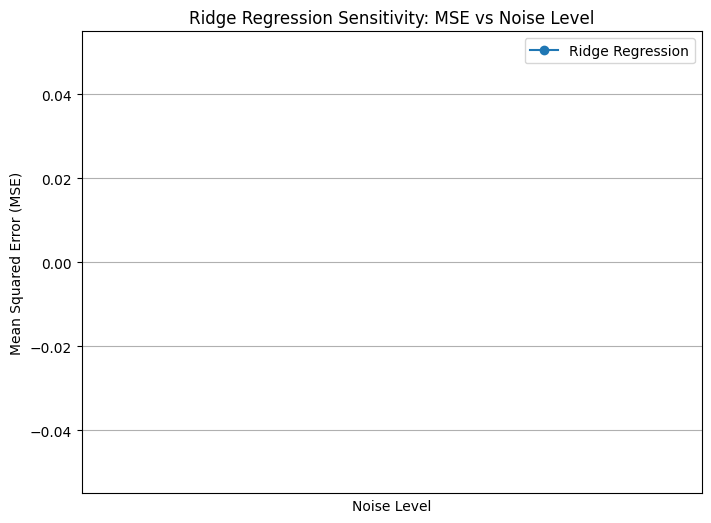

In [ ]:
subset_rr = sensitivity_df[sensitivity_df['Model'] == 'Ridge Regression']
plt.figure(figsize=(8, 6))
plt.plot(subset_rr['Noise Level'], subset_rr['R2'], marker='o', label='Ridge Regression')
plt.title('Ridge Regression Sensitivity: R² Score vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('R² Score')
plt.xticks(subset_rr['Noise Level'])
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(subset_rr['Noise Level'], subset_rr['MSE'], marker='o', label='Ridge Regression')
plt.title('Ridge Regression Sensitivity: MSE vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(subset_rr['Noise Level'])
plt.grid()
plt.legend()
plt.show()

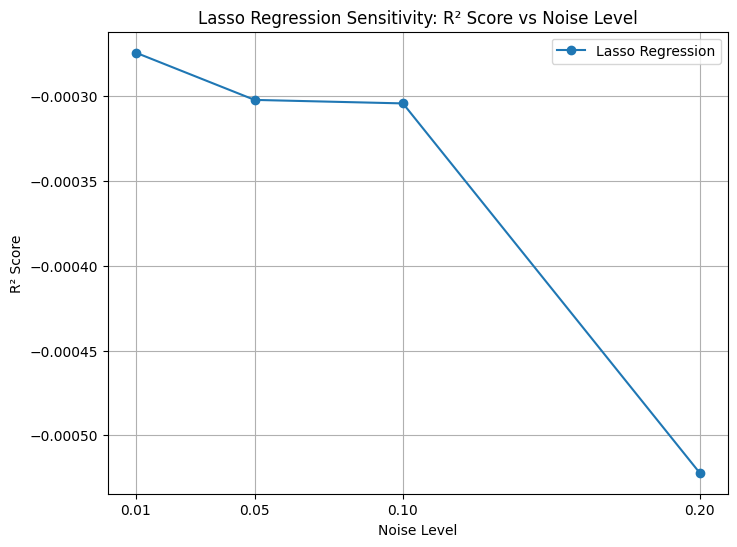

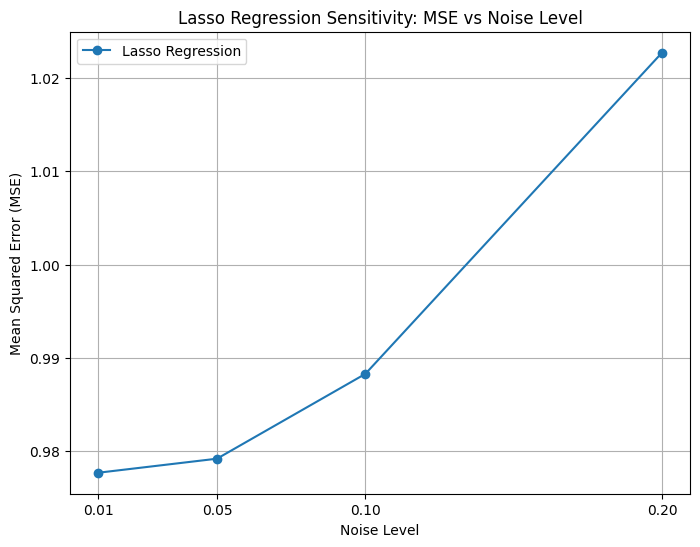

In [ ]:
subset_lr = sensitivity_df[sensitivity_df['Model'] == 'Lasso Regression']
plt.figure(figsize=(8, 6))
plt.plot(subset_lr['Noise Level'], subset_lr['R2'], marker='o', label='Lasso Regression')
plt.title('Lasso Regression Sensitivity: R² Score vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('R² Score')
plt.xticks(subset_lr['Noise Level'])
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(subset_lr['Noise Level'], subset_lr['MSE'], marker='o', label='Lasso Regression')
plt.title('Lasso Regression Sensitivity: MSE vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(subset_lr['Noise Level'])
plt.grid()
plt.legend()
plt.show()

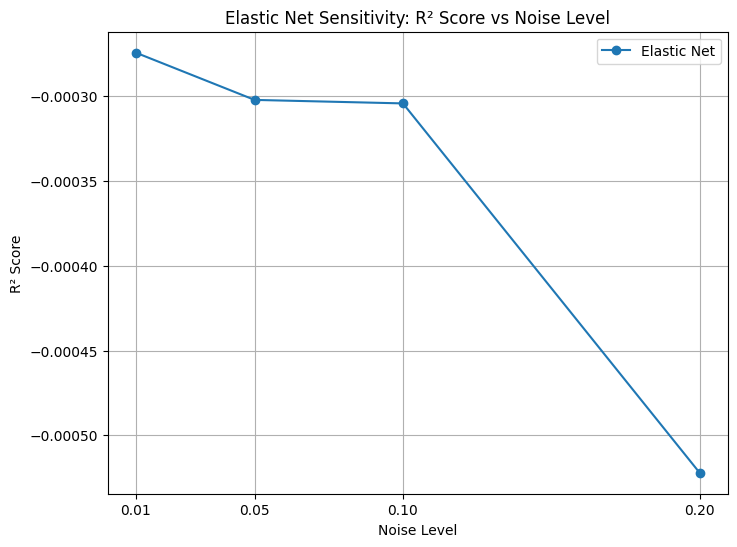

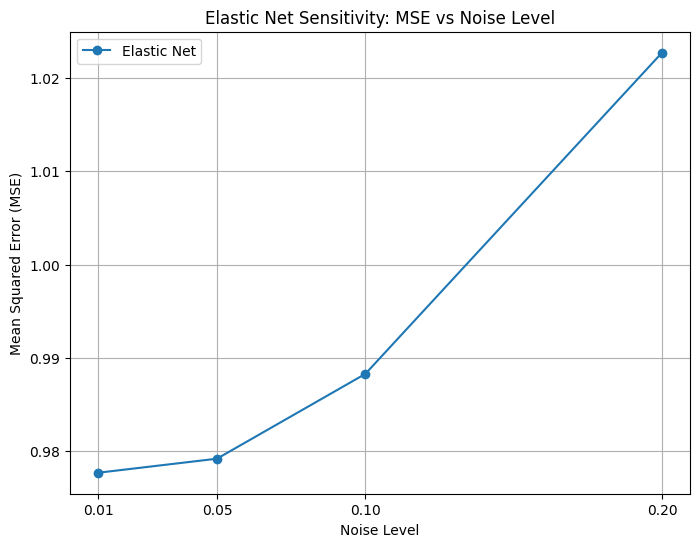

In [ ]:
subset_en = sensitivity_df[sensitivity_df['Model'] == 'elastic net']
plt.figure(figsize=(8, 6))
plt.plot(subset_en['Noise Level'], subset_en['R2'], marker='o', label='Elastic Net')
plt.title('Elastic Net Sensitivity: R² Score vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('R² Score')
plt.xticks(subset_en['Noise Level'])
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(subset_en['Noise Level'], subset_en['MSE'], marker='o', label='Elastic Net')
plt.title('Elastic Net Sensitivity: MSE vs Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(subset_en['Noise Level'])
plt.grid()
plt.legend()
plt.show()